In [1]:
import pandas as pd
import numpy as np

# Data Preparation

In [2]:
data = pd.read_csv("laptops.csv")

In [3]:
data.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [4]:
data.columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')

In [5]:
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [6]:
selected_columns = ['ram', 'storage', 'screen', 'final_price']
df = data[selected_columns]
df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


# Exploratory Data Analysis 

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


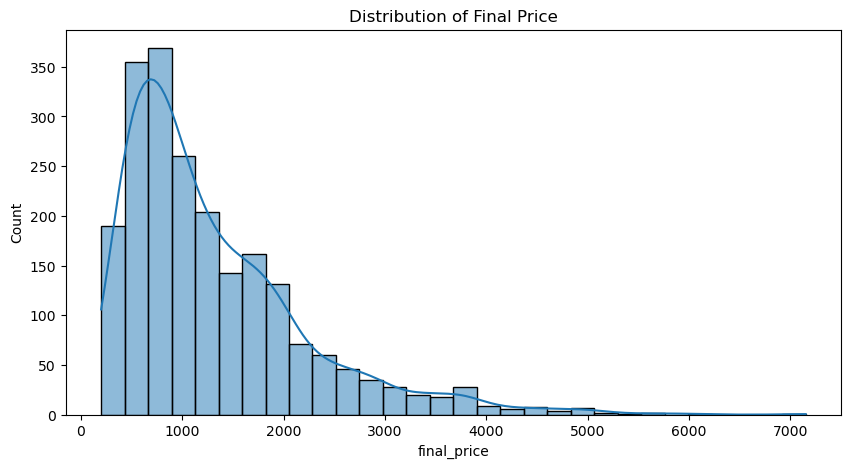

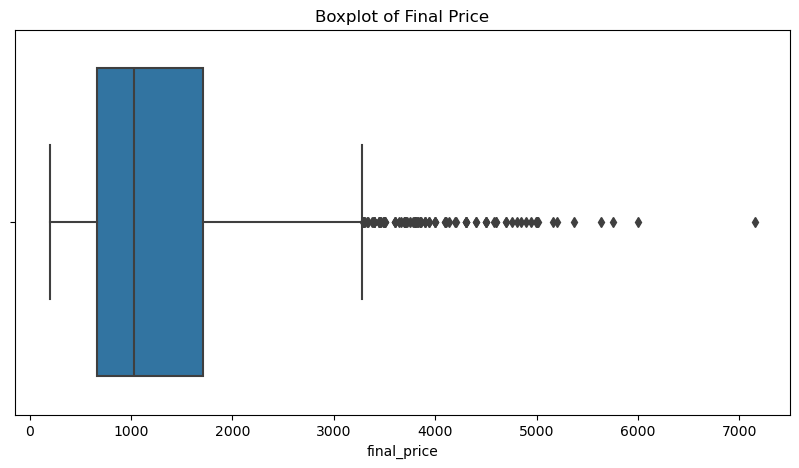

Skewness of final_price: 1.6495877663192549


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is stored in a DataFrame called df
# Histogram plot
plt.figure(figsize=(10, 5))
sns.histplot(df['final_price'], bins=30, kde=True)
plt.title('Distribution of Final Price')
plt.show()

# Boxplot to identify outliers and long tail
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['final_price'])
plt.title('Boxplot of Final Price')
plt.show()

# Skewness value
print("Skewness of final_price:", df['final_price'].skew())

In [8]:
df.dtypes

ram              int64
storage          int64
screen         float64
final_price    float64
dtype: object

In [9]:
df.index

RangeIndex(start=0, stop=2160, step=1)

In [10]:
df.shape

(2160, 4)

In [11]:
np.log1p([0, 1, 10, 1000, 7000])

array([0.        , 0.69314718, 2.39789527, 6.90875478, 8.85380827])

# Question 1

In [12]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

# Question 2

In [13]:
df["ram"].median()

16.0

# Prepare and split the dataset

In [14]:
n = len(df)
n

2160

In [15]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n_val, n_test, n_train

(432, 432, 1296)

In [16]:
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

In [17]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [18]:
df_train.shape

(1296, 4)

In [19]:
len(df_train), len(df_val), len(df_test)

(1296, 432, 432)